In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import scipy.stats as stats
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import chi2
from nltk.stem import LancasterStemmer
from scipy.stats import norm
from statsmodels.stats.weightstats import ztest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import nltk
from string import punctuation
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()
from nltk.corpus import stopwords
import string
import os
import re
%matplotlib inline

In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('wordnet')
nltk.download('LancasterStemmer')
nltk.download('WordNetLemmatizer')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading LancasterStemmer: Package 'LancasterStemmer'
[nltk_data]     not found in index
[nltk_data] Error loading WordNetLemmatizer: Package
[nltk_data]     'WordNetLemmatizer' not found in index
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
def clean_txt(sent):    
    #Stripping white spaces before and after the text
    sent = sent.strip()
    #Replacing multiple spaces with a single space
    result = re.sub("\s+", " ", sent)
    result = re.sub("Subject:","",result)
    #Replacing Non-Alpha-numeric and non space charecters with nothing
    result = re.sub("[^\w\s]","",result)
    
    tokens = word_tokenize(result.lower())
    stop_updated = stopwords.words("english")
    text = [lemm.lemmatize(term, pos = 'v')  for term in tokens if term not in stop_updated and len(term) > 2] 
    res = " ".join(text)
    return res

In [6]:
election=pd.read_csv("C:\\Users\\hp\\Desktop\\Python\\Sentiment analysis of tweets\\11th_hour_political_tweets.csv", delimiter='|')

In [7]:
# columns for sentiment 140
DATASET_COLUMNS  = ["sentiment", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"
data= pd.read_csv("C:\\Users\\hp\\Desktop\\Python\\Sentiment analysis of tweets\\training.1600000.processed.noemoticon.csv",encoding=DATASET_ENCODING ,names=DATASET_COLUMNS)

In [8]:
text=data['text']
text=text.dropna()

In [9]:
# abbrevation and some important punctuations:
all_abb_others = {'$': ' dollar ', '€': ' euro ', '4ao': 'for adults only', 'a.m': 'before midday', 'a3': 'anytime anywhere anyplace', 'aamof': 'as a matter of fact', 'acct': 'account', 'adih': 'another day in hell', 'afaic': 'as far as i am concerned', 'afaict': 'as far as i can tell', 'afaik': 'as far as i know', 'afair': 'as far as i remember', 'afk': 'away from keyboard', 'app': 'application', 'approx': 'approximately', 'apps': 'applications', 'asap': 'as soon as possible', 'asl': 'age, sex, location', 'atk': 'at the keyboard', 'ave.': 'avenue', 'aymm': 'are you my mother', 'ayor': 'at your own risk', 'b&b': 'bed and breakfast', 'b+b': 'bed and breakfast', 'b.c': 'before christ', 'b2b': 'business to business', 'b2c': 'business to customer', 'b4': 'before', 'b4n': 'bye for now', 'b@u': 'back at you', 'bae': 'before anyone else', 'bak': 'back at keyboard', 'bbbg': 'bye bye be good', 'bbc': 'british broadcasting corporation', 'bbias': 'be back in a second', 'bbl': 'be back later', 'bbs': 'be back soon', 'be4': 'before', 'bfn': 'bye for now', 'blvd': 'boulevard', 'bout': 'about', 'brb': 'be right back', 'bros': 'brothers', 'brt': 'be right there', 'bsaaw': 'big smile and a wink', 'btw': 'by the way', 'bwl': 'bursting with laughter', 'c/o': 'care of', 'cet': 'central european time', 'cf': 'compare', 'cia': 'central intelligence agency', 'csl': 'can not stop laughing', 'cu': 'see you', 'cul8r': 'see you later', 'cv': 'curriculum vitae', 'cwot': 'complete waste of time', 'cya': 'see you', 'cyt': 'see you tomorrow', 'dae': 'does anyone else', 'dbmib': 'do not bother me i am busy', 'diy': 'do it yourself', 'dm': 'direct message', 'dwh': 'during work hours', 'e123': 'easy as one two three', 'eet': 'eastern european time', 'eg': 'example', 'embm': 'early morning business meeting', 'encl': 'enclosed', 'encl.': 'enclosed', 'etc': 'and so on', 'faq': 'frequently asked questions', 'fawc': 'for anyone who cares', 'fb': 'facebook', 'fc': 'fingers crossed', 'fig': 'figure', 'fimh': 'forever in my heart', 'ft.': 'feet', 'ft': 'featuring', 'ftl': 'for the loss', 'ftw': 'for the win', 'fwiw': 'for what it is worth', 'fyi': 'for your information', 'g9': 'genius', 'gahoy': 'get a hold of yourself', 'gal': 'get a life', 'gcse': 'general certificate of secondary education', 'gfn': 'gone for now', 'gg': 'good game', 'gl': 'good luck', 'glhf': 'good luck have fun', 'gmt': 'greenwich mean time', 'gmta': 'great minds think alike', 'gn': 'good night', 'g.o.a.t': 'greatest of all time', 'goat': 'greatest of all time', 'goi': 'get over it', 'gps': 'global positioning system', 'gr8': 'great', 'gratz': 'congratulations', 'gyal': 'girl', 'h&c': 'hot and cold', 'hp': 'horsepower', 'hr': 'hour', 'hrh': 'his royal highness', 'ht': 'height', 'ibrb': 'i will be right back', 'ic': 'i see', 'icq': 'i seek you', 'icymi': 'in case you missed it', 'idc': 'i do not care', 'idgadf': 'i do not give a damn fuck', 'idgaf': 'i do not give a fuck', 'idk': 'i do not know', 'ie': 'that is', 'i.e': 'that is', 'ifyp': 'i feel your pain', 'IG': 'instagram', 'iirc': 'if i remember correctly', 'ilu': 'i love you', 'ily': 'i love you', 'imho': 'in my humble opinion', 'imo': 'in my opinion', 'imu': 'i miss you', 'iow': 'in other words', 'irl': 'in real life', 'j4f': 'just for fun', 'jic': 'just in case', 'jk': 'just kidding', 'jsyk': 'just so you know', 'l8r': 'later', 'lb': 'pound', 'lbs': 'pounds', 'ldr': 'long distance relationship', 'lmao': 'laugh my ass off', 'lmfao': 'laugh my fucking ass off', 'lol': 'laughing out loud', 'ltd': 'limited', 'ltns': 'long time no see', 'm8': 'mate', 'mf': 'motherfucker', 'mfs': 'motherfuckers', 'mfw': 'my face when', 'mofo': 'motherfucker', 'mph': 'miles per hour', 'mr': 'mister', 'mrw': 'my reaction when', 'ms': 'miss', 'mte': 'my thoughts exactly', 'nagi': 'not a good idea', 'nbc': 'national broadcasting company', 'nbd': 'not big deal', 'nfs': 'not for sale', 'ngl': 'not going to lie', 'nhs': 'national health service', 'nrn': 'no reply necessary', 'nsfl': 'not safe for life', 'nsfw': 'not safe for work', 'nth': 'nice to have', 'nvr': 'never', 'nyc': 'new york city', 'oc': 'original content', 'og': 'original', 'ohp': 'overhead projector', 'oic': 'oh i see', 'omdb': 'over my dead body', 'omg': 'oh my god', 'omw': 'on my way', 'p.a': 'per annum', 'p.m': 'after midday', 'pm': 'prime minister', 'poc': 'people of color', 'pov': 'point of view', 'pp': 'pages', 'ppl': 'people', 'prw': 'parents are watching', 'ps': 'postscript', 'pt': 'point', 'ptb': 'please text back', 'pto': 'please turn over', 'qpsa': 'what happens', 'ratchet': 'rude', 'rbtl': 'read between the lines', 'rlrt': 'real life retweet', 'rofl': 'rolling on the floor laughing', 'roflol': 'rolling on the floor laughing out loud', 'rotflmao': 'rolling on the floor laughing my ass off', 'rt': 'retweet', 'ruok': 'are you ok', 'sfw': 'safe for work', 'sk8': 'skate', 'smh': 'shake my head', 'sq': 'square', 'srsly': 'seriously', 'ssdd': 'same stuff different day', 'tbh': 'to be honest', 'tbs': 'tablespooful', 'tbsp': 'tablespooful', 'tfw': 'that feeling when', 'thks': 'thank you', 'tho': 'though', 'thx': 'thank you', 'tia': 'thanks in advance', 'til': 'today i learned', 'tl;dr': 'too long i did not read', 'tldr': 'too long i did not read', 'tmb': 'tweet me back', 'tntl': 'trying not to laugh', 'ttyl': 'talk to you later', 'u': 'you', 'u2': 'you too', 'u4e': 'yours for ever', 'utc': 'coordinated universal time', 'w/': 'with', 'w/o': 'without', 'w8': 'wait', 'wassup': 'what is up', 'wb': 'welcome back', 'wtf': 'what the fuck', 'wtg': 'way to go', 'wtpa': 'where the party at', 'wuf': 'where are you from', 'wuzup': 'what is up', 'wywh': 'wish you were here', 'yd': 'yard', 'ygtr': 'you got that right', 'ynk': 'you never know', 'zzz': 'sleeping bored and tired', "ain't": 'is not', "aren't": 'are not', "can't": 'cannot', "'cause": 'because', "could've": 'could have', "couldn't": 'could not', "didn't": 'did not', "doesn't": 'does not', "don't": 'do not', "hadn't": 'had not', "hasn't": 'has not', "haven't": 'have not', "he'd": 'he would', "he'll": 'he will', "he's": 'he is', "how'd": 'how did', "how'd'y": 'how do you', "how'll": 'how will', "how's": 'how is', "I'd": 'I would', "I'd've": 'I would have', "I'll": 'I will', "I'll've": 'I will have', "I'm": 'I am', "I've": 'I have', "i'd": 'i would', "i'd've": 'i would have', "i'll": 'i will', "i'll've": 'i will have', "i'm": 'i am', "i've": 'i have', "isn't": 'is not', "it'd": 'it would', "it'd've": 'it would have', "it'll": 'it will', "it'll've": 'it will have', "it's": 'it is', "let's": 'let us', "ma'am": 'madam', "mayn't": 'may not', "might've": 'might have', "mightn't": 'might not', "mightn't've": 'might not have', "must've": 'must have', "mustn't": 'must not', "mustn't've": 'must not have', "needn't": 'need not', "needn't've": 'need not have', "o'clock": 'of the clock', "oughtn't": 'ought not', "oughtn't've": 'ought not have', "shan't": 'shall not', "sha'n't": 'shall not', "shan't've": 'shall not have', "she'd": 'she would', "she'd've": 'she would have', "she'll": 'she will', "she'll've": 'she will have', "she's": 'she is', "should've": 'should have', "shouldn't": 'should not', "shouldn't've": 'should not have', "so've": 'so have', "so's": 'so as', "this's": 'this is', "that'd": 'that would', "that'd've": 'that would have', "that's": 'that is', "there'd": 'there would', "there'd've": 'there would have', "there's": 'there is', "here's": 'here is', "they'd": 'they would', "they'd've": 'they would have', "they'll": 'they will', "they'll've": 'they will have', "they're": 'they are', "they've": 'they have', "to've": 'to have', "wasn't": 'was not', "we'd": 'we would', "we'd've": 'we would have', "we'll": 'we will', "we'll've": 'we will have', "we're": 'we are', "we've": 'we have', "weren't": 'were not', "what'll": 'what will', "what'll've": 'what will have', "what're": 'what are', "what's": 'what is', "what've": 'what have', "when's": 'when is', "when've": 'when have', "where'd": 'where did', "where's": 'where is', "where've": 'where have', "who'll": 'who will', "who'll've": 'who will have', "who's": 'who is', "who've": 'who have', "why's": 'why is', "why've": 'why have', "will've": 'will have', "won't": 'will not', "won't've": 'will not have', "would've": 'would have', "wouldn't": 'would not', "wouldn't've": 'would not have', "y'all": 'you all', "y'all'd": 'you all would', "y'all'd've": 'you all would have', "y'all're": 'you all are', "y'all've": 'you all have', "you'd": 'you would', "you'd've": 'you would have', "you'll": 'you will', "you'll've": 'you will have', "you're": 'you are', "you've": 'you have', 'colour': 'color', 'centre': 'center', 'favourite': 'favorite', 'travelling': 'traveling', 'counselling': 'counseling', 'theatre': 'theater', 'cancelled': 'canceled', 'labour': 'labor', 'organisation': 'organization', 'wwii': 'world war 2', 'citicise': 'criticize', 'youtu ': 'youtube ', 'Qoura': 'Quora', 'sallary': 'salary', 'Whta': 'What', 'narcisist': 'narcissist', 'howdo': 'how do', 'whatare': 'what are', 'howcan': 'how can', 'howmuch': 'how much', 'howmany': 'how many', 'whydo': 'why do', 'doI': 'do I', 'theBest': 'the best', 'howdoes': 'how does', 'mastrubation': 'masturbation', 'mastrubate': 'masturbate', 'mastrubating': 'masturbating', 'pennis': 'penis', 'Etherium': 'Ethereum', 'narcissit': 'narcissist', 'bigdata': 'big data', '2k17': '2017', '2k18': '2018', 'qouta': 'quota', 'exboyfriend': 'ex boyfriend', 'airhostess': 'air hostess', 'whst': 'what', 'watsapp': 'whatsapp', 'demonitisation': 'demonetization', 'demonitization': 'demonetization', 'demonetisation': 'demonetization'}


def replace_words(text, replace_dict):
    
    regex = re.compile(r'\b(' + '|'.join(replace_dict.keys()) + r')\b')
    return regex.sub(lambda x: replace_dict[x.group()] if x.group() in replace_dict else x.group(), text)

text = text.apply(lambda x: x.lower())
text=text.apply(lambda x: replace_words(x, all_abb_others))

In [10]:
def remove_emoji(text):
    emoji_pattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


def remove_html(text):
    html = re.compile(r'^[^ ]<.*?>|&([a-z0-9]+|#[0-9]\"\'\“{1,6}|#x[0-9a-f]{1,6});[^A-Za-z0-9]+')
    return re.sub(html, '', text)

text=text.apply(lambda x: remove_emoji(x))
text=text.apply(lambda x: remove_html(x))

In [11]:
def preprocess(textdata):
    processedText = []
    
    # Create Lemmatizer and Stemmer.
    
    # Defining regex patterns.
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}
    
    for tweet in textdata:
#         tweet = tweet.lower()
        
        # Replace all URls with 'URL'
        tweet = re.sub(urlPattern,' URL',tweet)
        # Replace all emojis.
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])        
        # Replace @USERNAME to 'USER'.
        tweet = re.sub(userPattern,' USER', tweet)        
        # Replace all non alphabets.
        tweet = re.sub(alphaPattern, " ", tweet)
        # Replace 3 or more consecutive letters by 2 letter.
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

        tweetwords = ''
        for word in tweet.split():
                if len(word)>1:
                    # Lemmatizing the word.
                    tweetwords += (word+' ')
            
        processedText.append(tweetwords)
        
    return processedText

In [12]:
stop_words_removal=['not', "n't", 'against', 'no', 'nor', 'don', "don't", 'should', "should've", 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't","further"]
def stop_words_removal(textdata):
    processedText = []
    
    # Create Lemmatizer and Stemmer.
    
    
    for tweet in textdata:
        
        tweetwords = ''
        stop_updated = stopwords.words("english")  + ['not', "n't", 'against', 'no', 'nor', 'don', "don't", 'should', "should've", 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't","further"]
        for word in tweet.split():
            # Checking if the word is a stopword.
            if word not in stop_updated:
                    tweetwords += (word+' ')
            
        processedText.append(tweetwords)
        
    return processedText

In [13]:
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
processedtext = preprocess(list(text))
stopwordremoved = stop_words_removal(processedtext)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
vector = tfidf.fit_transform(stopwordremoved)


In [16]:
data=data.dropna(subset=['text'])

In [17]:
y=data['sentiment']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vector, 
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=42,
                                                    stratify = y)

In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

In [20]:
def metrics(y_train,y_train_pred,y_test,y_test_pred):
  print("training accuracy = ",round(accuracy_score(y_train,y_train_pred),2)*100)
  ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,normalize = 'all')
  print(classification_report(y_train,y_train_pred))
  plt.show()

  print("testing accuracy = ",round(accuracy_score(y_test,y_test_pred),2)*100)
  ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred,normalize = 'all')
  print(classification_report(y_test,y_test_pred))
  plt.show()

In [21]:
 tfidf.get_feature_names_out() 

array(['00', '001', '0010utc', ..., 'zztop', 'zzuu', 'zzy'], dtype=object)

training accuracy =  80.0
              precision    recall  f1-score   support

           0       0.80      0.81      0.80    536000
           4       0.80      0.79      0.80    536000

    accuracy                           0.80   1072000
   macro avg       0.80      0.80      0.80   1072000
weighted avg       0.80      0.80      0.80   1072000



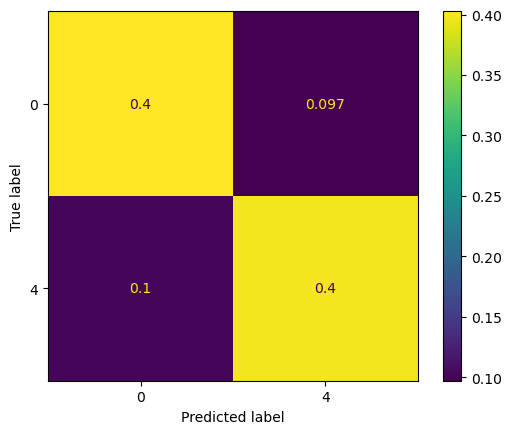

testing accuracy =  76.0
              precision    recall  f1-score   support

           0       0.76      0.77      0.77    264000
           4       0.77      0.76      0.76    264000

    accuracy                           0.76    528000
   macro avg       0.76      0.76      0.76    528000
weighted avg       0.76      0.76      0.76    528000



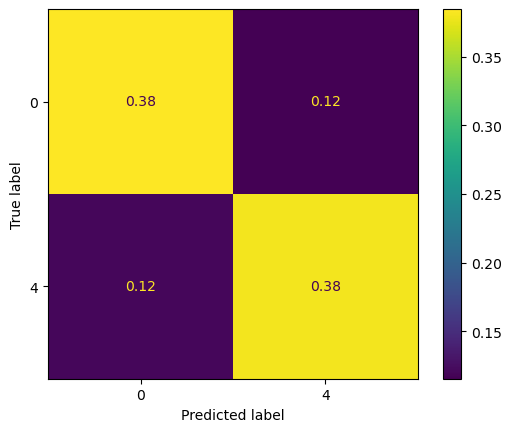

In [22]:
NB = MultinomialNB()
NB.fit(X_train,y_train)
y_train_pred = NB.predict(X_train)
y_test_pred = NB.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)

training accuracy =  83.0
              precision    recall  f1-score   support

           0       0.84      0.82      0.83    536000
           4       0.82      0.84      0.83    536000

    accuracy                           0.83   1072000
   macro avg       0.83      0.83      0.83   1072000
weighted avg       0.83      0.83      0.83   1072000



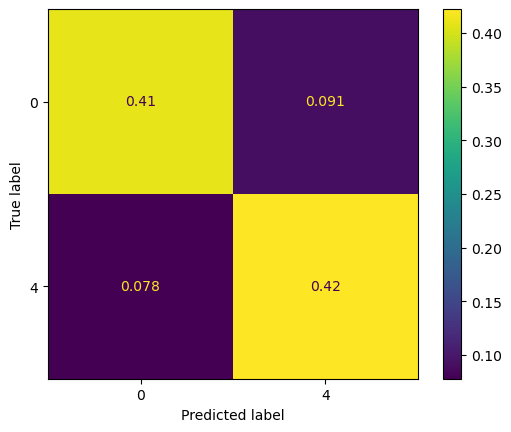

testing accuracy =  77.0
              precision    recall  f1-score   support

           0       0.78      0.76      0.77    264000
           4       0.76      0.79      0.78    264000

    accuracy                           0.77    528000
   macro avg       0.77      0.77      0.77    528000
weighted avg       0.77      0.77      0.77    528000



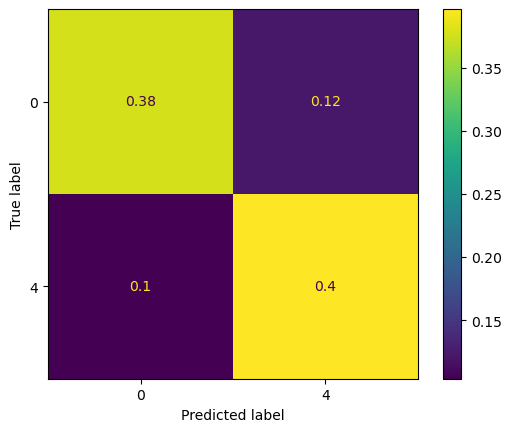

In [23]:
svc = LinearSVC()
svc.fit(X_train,y_train)
y_train_pred = svc.predict(X_train)
y_test_pred = svc.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


training accuracy =  80.0
              precision    recall  f1-score   support

           0       0.81      0.78      0.80    536000
           4       0.79      0.82      0.80    536000

    accuracy                           0.80   1072000
   macro avg       0.80      0.80      0.80   1072000
weighted avg       0.80      0.80      0.80   1072000



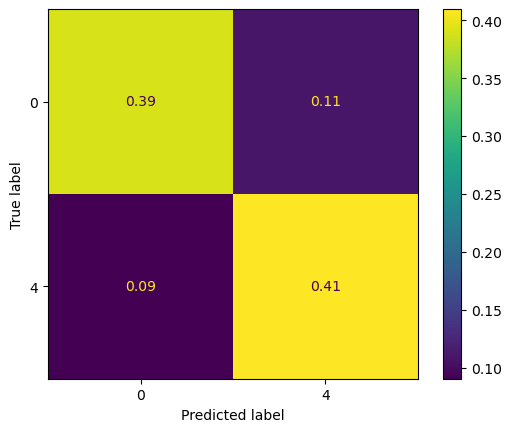

testing accuracy =  78.0
              precision    recall  f1-score   support

           0       0.79      0.76      0.78    264000
           4       0.77      0.80      0.79    264000

    accuracy                           0.78    528000
   macro avg       0.78      0.78      0.78    528000
weighted avg       0.78      0.78      0.78    528000



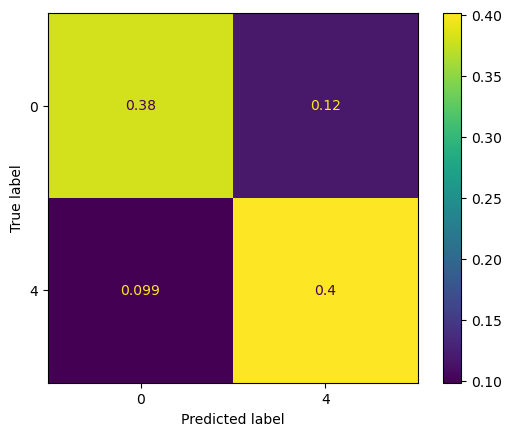

In [24]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
metrics(y_train,y_train_pred,y_test,y_test_pred)

In [25]:
df=election['full_text']
df=df.dropna()


In [26]:
## remove stopwords and punctuation marks
stuff_to_be_removed = list(stopwords.words('english'))+list(punctuation)
stemmer = LancasterStemmer()

corpus = df.tolist()
print(len(corpus))
print(corpus[0])


final_corpus = []
final_corpus_joined = []
for i in df.index:

    text = re.sub('[^a-zA-Z]', ' ', df[i])
    #Convert to lowercase
    text = text.lower()
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()

    text = [word for word in text 
            if not word in stuff_to_be_removed] 
    text1 = " ".join(text)
    final_corpus.append(text)
    final_corpus_joined.append(text1)

46041
Guwahati has gained a lot of prominence in recent years due to PM Shri @narendramodi ji's #ActEast Policy. 

The infrastructural upgrades undertaken will go a long way in establishing Guwahati as one of India's smart cities and as gateway to @ASEAN countries: CM


In [27]:
df_vector=tfidf.transform(final_corpus_joined)

In [28]:
y_pred_svc=svc.predict(df_vector)

In [29]:
election=election.dropna(subset=['full_text'])

In [30]:
election['Sentiment']=y_pred_svc
election['cleaned_data']=final_corpus_joined
election['cleaned_data_list']=final_corpus

In [31]:
election.head()

,Unnamed: 0,last_updated,tweet_id,created_at,user_location,full_text,quote_count,reply_count,retweet_count,favorite_count,...,Neg_ADV_count,neg,neu,pos,compound,weighted_compound,weighted_compound_new,Sentiment,cleaned_data,cleaned_data_list
0,0,2019-03-06T17:30:21.000+05:30,1.103136e+18,2019-03-06T03:33:25.000+05:30,Guwahati,Guwahati has gained a lot of prominence in rec...,0,4.0,113.0,113.0,...,0.0,0.000,0.880,0.120,0.6486,73.2918,0.000911,0,guwahati gained lot prominence recent years du...,"[guwahati, gained, lot, prominence, recent, ye..."
1,1,2019-03-17T18:11:58.000+05:30,1.107333e+18,2019-03-17T17:27:57.000+05:30,NaN,RSS in school days itself? Indoctrinated since...,0,0.0,5.0,5.0,...,0.0,0.332,0.579,0.088,-0.7906,-3.9530,-0.000303,0,rss school days indoctrinated since childhood ...,"[rss, school, days, indoctrinated, since, chil..."
2,2,2019-03-23T18:07:38.000+05:30,1.109417e+18,2019-03-23T11:28:31.000+05:30,New Delhi,Words don't exist in Vaccum!\nModi's post Pulw...,0,4.0,31.0,31.0,...,0.0,0.130,0.870,0.000,-0.6900,-21.3900,-0.000577,4,words exist vaccum modi post pulwama words gha...,"[words, exist, vaccum, modi, post, pulwama, wo..."
3,3,2019-03-11T17:47:32.000+05:30,1.100300e+18,2019-02-26T07:40:28.000+05:30,NaN,"India's #Icecream Industry stands at 15,000 cr...",0,0.0,3.0,3.0,...,0.0,0.000,0.955,0.045,0.1779,0.5337,-0.000232,0,india icecream industry stands crores fastest ...,"[india, icecream, industry, stands, crores, fa..."
4,4,2019-02-27T18:18:42.000+05:30,1.100733e+18,2019-02-27T12:21:18.000+05:30,Delhi | Odisha,*40 CRPF Jawans killed in Pulwama Attack\n*IAF...,0,0.0,9.0,9.0,...,0.0,0.362,0.638,0.000,-0.9638,-8.6742,-0.000377,0,crpf jawans killed pulwama attack iaf strike p...,"[crpf, jawans, killed, pulwama, attack, iaf, s..."


In [32]:
positive = election[election['Sentiment'] == 4]
positive_list = positive['cleaned_data_list'].tolist()

negative = election[election['Sentiment'] == 0]
negative_list = negative['cleaned_data_list'].tolist()



In [33]:
positive_all = " ".join([word for sent in positive_list for word in sent ])

In [34]:
positive_all = " ".join([word for sent in positive_list for word in sent ])
negative_all = " ".join([word for sent in negative_list for word in sent ])

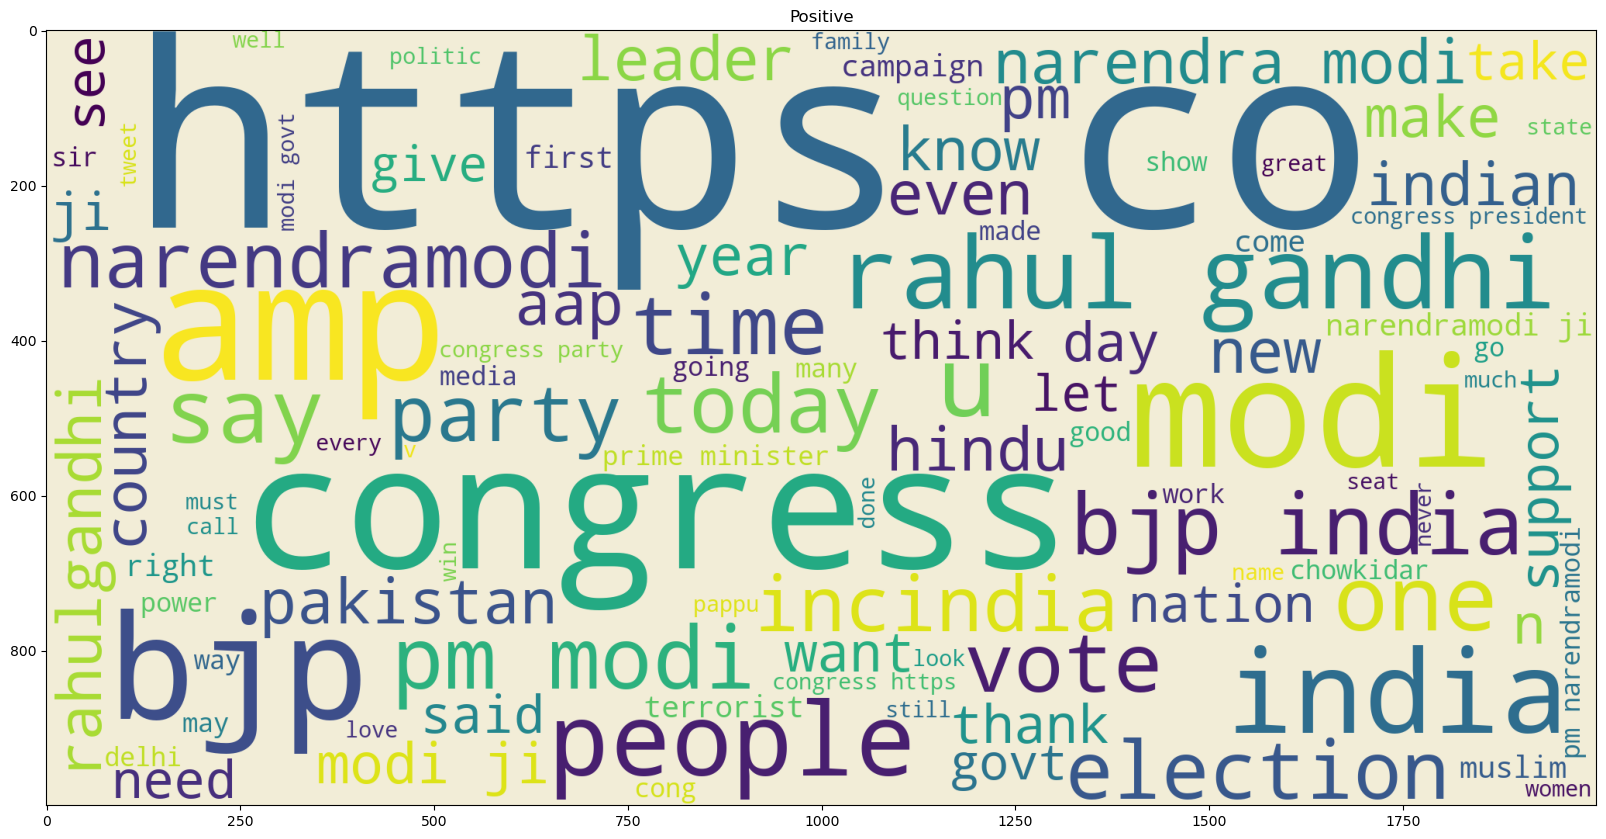

In [39]:
from wordcloud import WordCloud
WordCloud()
wordcloud = WordCloud(width=2000,
                      height=1000,
                      background_color='#F2EDD7FF',
                      max_words = 100).generate(positive_all)

plt.figure(figsize=(20,30))
plt.imshow(wordcloud)
plt.title("Positive")
plt.show()

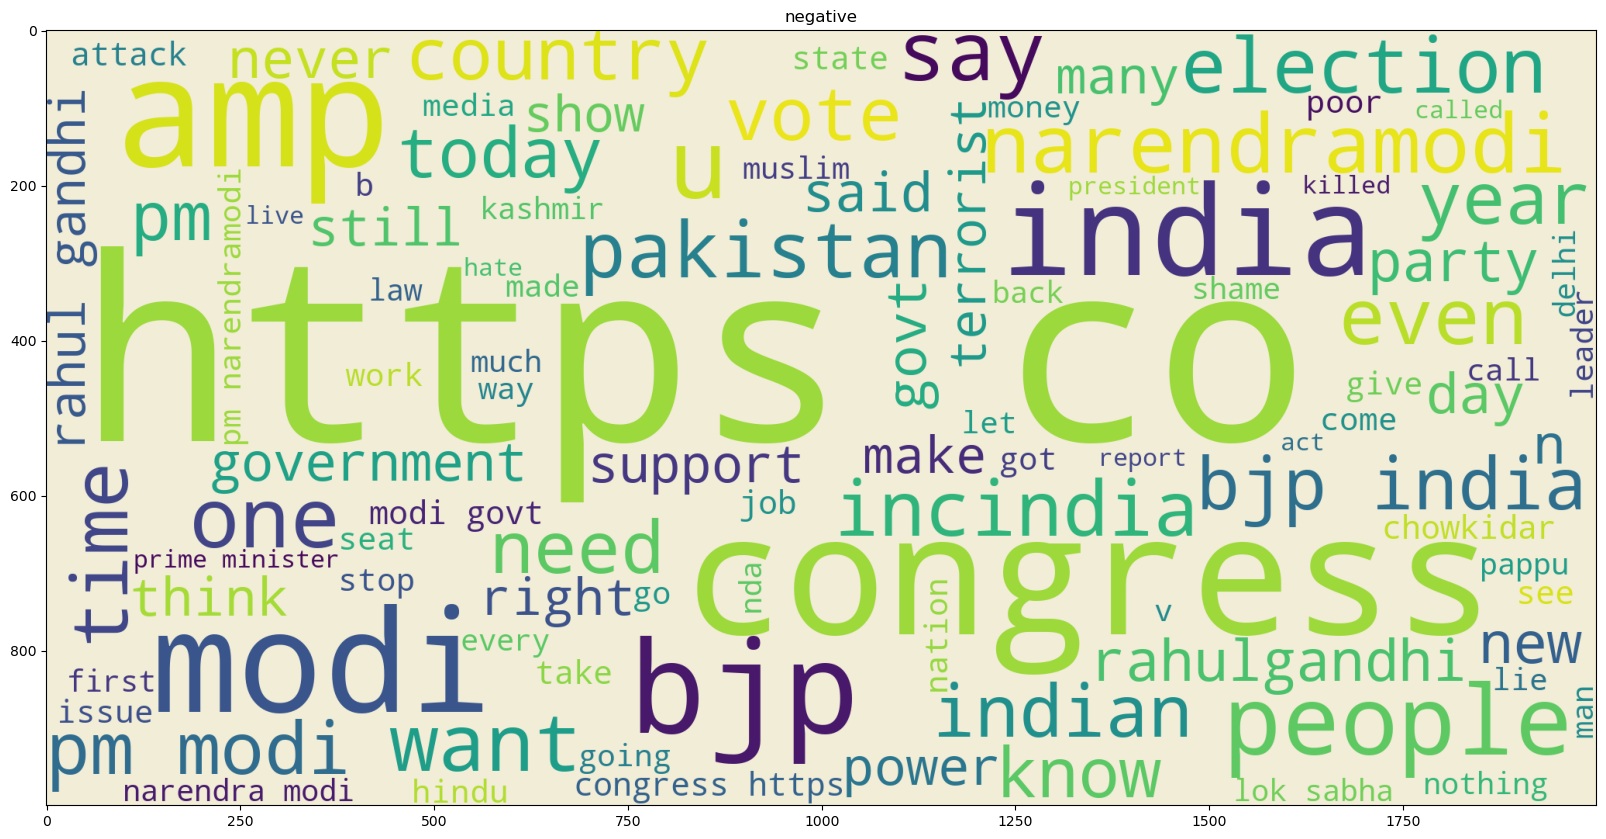

In [40]:
from wordcloud import WordCloud
WordCloud()
wordcloud = WordCloud(width=2000,
                      height=1000,
                      background_color='#F2EDD7FF',
                      max_words = 100).generate(negative_all)

plt.figure(figsize=(20,30))
plt.imshow(wordcloud)
plt.title("negative")
plt.show()

In [41]:
counts = election["Sentiment"].value_counts()

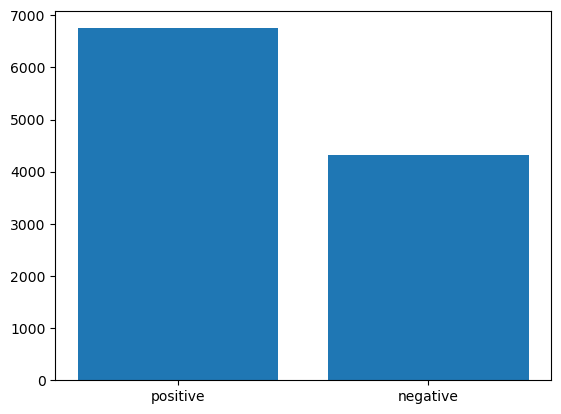

In [42]:
election['Sentiment'] = election['Sentiment'].replace({4: "positive"})
election['Sentiment'] = election['Sentiment'].replace({0: "negative"})
def searcher(query):
    querys = election.loc[election['cleaned_data'].str.contains(query, case=False)]
    counts = querys["Sentiment"].value_counts()
    plt.bar(counts.index, counts.values)
    plt.show()
searcher("bjp")

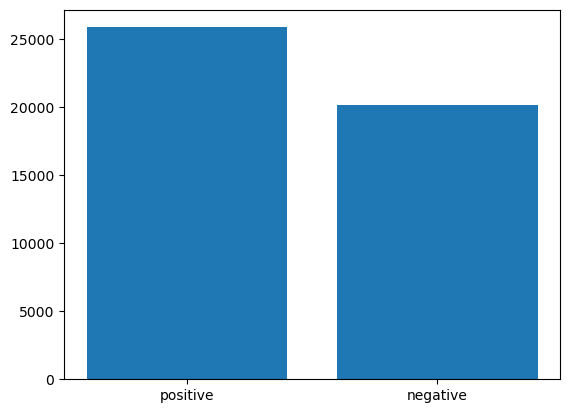

In [43]:
counts = election["Sentiment"].value_counts()
plt.bar(counts.index, counts.values)
plt.show()